In [ ]:
geopandas==0.4.0
descartes==1.1.0
folium==0.7.0

This post will show you a sneak peek of what geospatial visualization is and what can be done with it.

We'll be covering:

- ✅ How to get and analyze geospatial data
- ✅ How to process and filter geospatial data
- ✅ What a GeoDataFrames is and how to use it
- ✅ How to make some cool geospatial graphs
- ✅ How to place our geospatial data over real maps

## Set up packages

Before continue we need to be sure we have installed some packages, as we'll be using these throughout the rest of the guide.

Mainly we'll be using `pandas`, `geopandas`, `shapely` and `matplotlib`.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import matplotlib.pyplot as plt

## Loading our data

`GeoPandas` bring us three already-available dataframes. For this guide we'll be using some of that data.

In [2]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

Let's load the first two dataframes in two variables: `world` and `cities`.

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

The `world` variable of type `GetDataFrame`, has shape `(177 rows, 6 columns)` and contains information about countries in the world:

- `pop_est`: estimate population
- `continent`
- `name`
- `iso_a3`
- `gdp_md_est`: Gross domestic product (GDP) estimates
- `geometry`

It's a `GeoDataFrame` becouse it has a `geometry` attribute, in this case for each row it has a `POLYGON` of the country.

In [4]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [5]:
world.shape

(177, 6)

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


The `cities` variable of type `GetDataFrame`, has shape `(202 rows, 2 columns)` and contains information about each city in the world:
- `name`
- `geometry`

It's a `GeoDataFrame` becouse it has a `geometry` attribute, in this case for each row it has a `POINT` representing the city.

In [7]:
type(cities)

geopandas.geodataframe.GeoDataFrame

In [8]:
cities.shape

(202, 2)

In [9]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


## Exploring and understanding our data

First of all we are going to remove countries where `pop_est` is 0 or are in `Antarctica`.

In [10]:
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

Then we'll do is see how many _real_ continents we have in our data.

As you can see there are **seven regions** marked as continents, as America is divided in `Souch America` and `North America` and `Seven seas (open ocean)` is marked as a continent too.

In [11]:
continents = world['continent'].unique()
continents

array(['Asia', 'Africa', 'Europe', 'South America',
       'Seven seas (open ocean)', 'Oceania', 'North America'],
      dtype=object)

Let's analyze mean population per continent.

`Asia` is, by far, the most populated continent.

continent
Asia                       86933036.0
South America              30335037.0
North America              29963943.0
Africa                     19865640.0
Europe                     18670031.0
Oceania                     4788516.0
Seven seas (open ocean)         140.0
Name: pop_est, dtype: float64


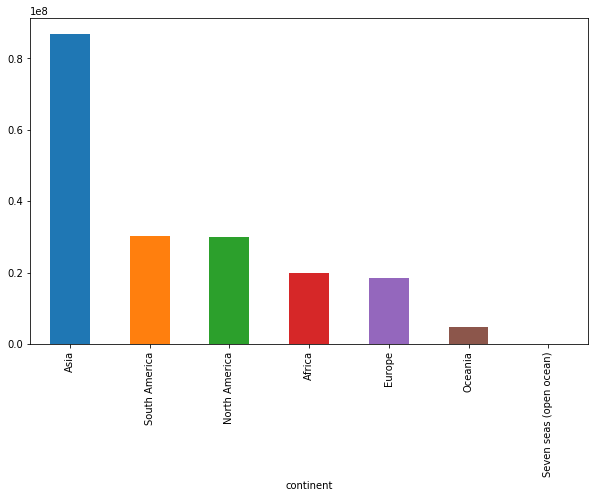

In [12]:
mean_pop_by_continent = world.groupby(['continent'])['pop_est'].mean()
mean_pop_by_continent = mean_pop_by_continent.round().sort_values(ascending=False)
print(mean_pop_by_continent)

mean_pop_by_continent.plot(kind='bar', figsize=(10,6))

Let's calculate `gdp_per_cap` GDP per capita as `gdp_md_est` / `pop_est`.

The region of the `Open ocean` seems to have the **biggest GDP per capita** in the world, followed by `Europe` and `North America`. 

continent
Seven seas (open ocean)    0.114286
Europe                     0.025961
North America              0.014725
Asia                       0.013606
Oceania                    0.013074
South America              0.011046
Africa                     0.003392
Name: gdp_per_cap, dtype: float64


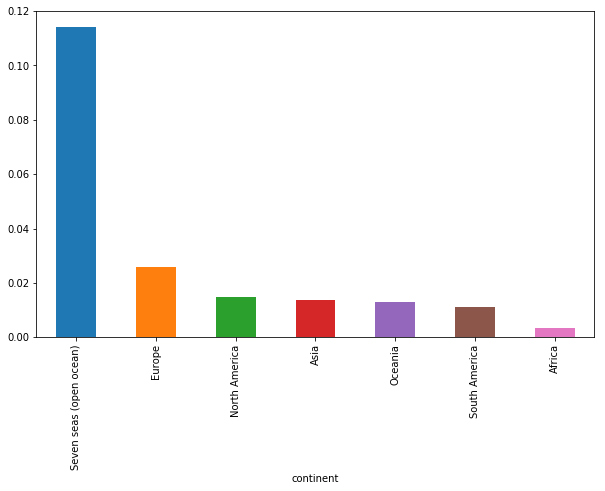

In [13]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

mean_gdp_by_continent = world.groupby(['continent'])['gdp_per_cap'].mean()
mean_gdp_by_continent = mean_gdp_by_continent.sort_values(ascending=False)
print(mean_gdp_by_continent)

mean_gdp_by_continent.plot(kind='bar', figsize=(10,6))

We'll finally count how many countries are on each continent. And take `North America` to continue our analysis.

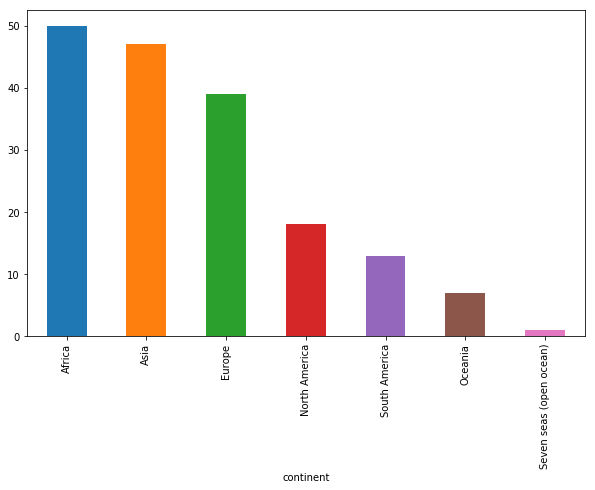

In [14]:
countries_by_continent = world.groupby(['continent'])['continent'].count()
countries_by_continent = countries_by_continent.sort_values(ascending=False)

countries_by_continent.plot(kind='bar', figsize=(10,6))

## Filtering North America countries

As we said before we are going to take all the **18 countries** in `North America` to continue our analysis.

In [15]:
north_america_countries = world[world.continent == 'North America'].name

list(north_america_countries)

['Bahamas',
 'Belize',
 'Canada',
 'Costa Rica',
 'Cuba',
 'Dominican Rep.',
 'Greenland',
 'Guatemala',
 'Honduras',
 'Haiti',
 'Jamaica',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Puerto Rico',
 'El Salvador',
 'Trinidad and Tobago',
 'United States']

Now filter our `world` data and keep only the data belonging to North America countries.

In [16]:
north_america = world[world.continent == 'North America']

north_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
17,309156.0,North America,Bahamas,BHS,9093.0,(POLYGON ((-77.53465999999997 23.7597499999999...,0.029412
20,307899.0,North America,Belize,BLZ,2536.0,POLYGON ((-89.14308041050332 17.80831899664932...,0.008236
27,33487208.0,North America,Canada,CAN,1300000.0,(POLYGON ((-63.66449999999998 46.5500099999999...,0.038821
36,4253877.0,North America,Costa Rica,CRI,48320.0,POLYGON ((-82.96578304719736 8.225027980985985...,0.011359
37,11451652.0,North America,Cuba,CUB,108200.0,POLYGON ((-82.26815121125706 23.18861074471771...,0.009448


At this point we have the whole data (`pop_est`, `name`, `gdp_md_est`, `gdp_per_cap`) and geospatial `POLYGON` object of each North America country.

## Creating a `GeoDataFrame` from a `DataFrame` with coordinates

Before continue with the analysis, let's create another data structure containing a `POINT` geometry representing some capital cities of North America countries. 

We'll create a new `GeoDataFrame` starting from a regular `DataFrame` that has coordinates either WKT (<a href="https://en.wikipedia.org/wiki/Well-known_text" target="_blank">well-known text</a>) format, or in two columns.

### From longitudes and latitudes

First, let’s consider a `DataFrame` containing capital cities and their respective longitudes and latitudes.

> For this example longitudes and latitudes were manually extracted from `cities` GeoDataFrame.

In [17]:
north_america_df = pd.DataFrame({
    'city': ['Juneau', 'Nassau', 'Belmopan', 'Ottawa', 'San Jose', 'Havana',
             'Santo Domingo', 'Nuuk', 'Kingston', 'Mexico City',
             'Washington, D.C.'],
    'country': ['Alaska', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                'Dominican Republic', 'Greenland', 'Jamaica', 'Mexico',
                'United States of America'],
    'latitude': [58.30, 9.93, 17.97, 45.41, 17.25, 25.08,
              23.13, 64.18, 18.47, 38.90, 19.44],
    'longitude': [-134.42, -84.08, -76.76, -75.70, -88.76, -77.35,
                 -82.36, -51.72, -69.90, -77.01, -99.13]
})

    
north_america_df.head()

,city,country,latitude,longitude
0,Juneau,Alaska,58.30,-134.42
1,Nassau,Bahamas,9.93,-84.08
2,Belmopan,Belize,17.97,-76.76
3,Ottawa,Canada,45.41,-75.70
4,San Jose,Costa Rica,17.25,-88.76


A `GeoDataFrame` needs a `shapely` object, so we create a new column `coordinates` as a tuple of `longitude` and `latitude`:

In [18]:
north_america_df['coordinates'] = list(zip(north_america_df['longitude'],
                                           north_america_df['latitude']))
north_america_df.head()

,city,country,latitude,longitude,coordinates
0,Juneau,Alaska,58.30,-134.42,"(-134.42, 58.3)"
1,Nassau,Bahamas,9.93,-84.08,"(-84.08, 9.93)"
2,Belmopan,Belize,17.97,-76.76,"(-76.76, 17.97)"
3,Ottawa,Canada,45.41,-75.70,"(-75.7, 45.41)"
4,San Jose,Costa Rica,17.25,-88.76,"(-88.76, 17.25)"


Then, we transform tuples to `POINT`:

In [19]:
north_america_df['coordinates'] = north_america_df['coordinates'].apply(Point)

north_america_df.head()

,city,country,latitude,longitude,coordinates
0,Juneau,Alaska,58.30,-134.42,POINT (-134.42 58.3)
1,Nassau,Bahamas,9.93,-84.08,POINT (-84.08 9.93)
2,Belmopan,Belize,17.97,-76.76,POINT (-76.76000000000001 17.97)
3,Ottawa,Canada,45.41,-75.70,POINT (-75.7 45.41)
4,San Jose,Costa Rica,17.25,-88.76,POINT (-88.76000000000001 17.25)


Finally, we can create the `GeoDataFrame` by setting `geometry` with the coordinates created previously.

In [20]:
north_america_capital_cities = gpd.GeoDataFrame(north_america_df,
                                                geometry='coordinates')

`north_america_capital_cities` looks like this:

In [21]:
type(north_america_capital_cities)

geopandas.geodataframe.GeoDataFrame

In [22]:
north_america_capital_cities.head()

,city,country,latitude,longitude,coordinates
0,Juneau,Alaska,58.30,-134.42,POINT (-134.42 58.3)
1,Nassau,Bahamas,9.93,-84.08,POINT (-84.08 9.93)
2,Belmopan,Belize,17.97,-76.76,POINT (-76.76000000000001 17.97)
3,Ottawa,Canada,45.41,-75.70,POINT (-75.7 45.41)
4,San Jose,Costa Rica,17.25,-88.76,POINT (-88.76000000000001 17.25)


Another shorter way to get the same capital cities GeoDataFrame could have been getting the `geometry` already defined at `cities` GeoDataFrame of the selected cities.

In [23]:
'''
north_america_df = pd.DataFrame({
    'city': ['Nassau', 'Belmopan', 'Ottawa', 'San Jose', 'Havana',
             'Santo Domingo', 'Kingston', 'Mexico City', 'Washington, D.C.'],
    'country': ['Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                'Dominican Republic', 'Jamaica', 'Mexico', 'United States of America'],
    'coordinates': cities[cities['name'].isin(north_america_df['city'])]['geometry']
})

north_america_capital_cities = gpd.GeoDataFrame(north_america_df,
                                                geometry='coordinates')

print(type(north_america_capital_cities))
north_america_capital_cities.head()
'''
pass

## Making geospatial graphs

Let's plot the `POLYGON` coordinates of each country over a country-level map, restricting the plot to our selected North America countries.

Our `GeoDataFrames` can be visually shown by calling a `plot()` function. There are plenty of parameters, we'll see some of them.

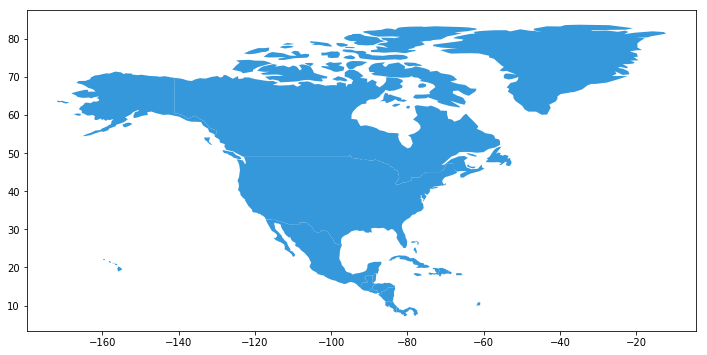

In [24]:
north_america.plot(color='#3498db',
                   figsize=(12,8))

Now following the same process let's show the capital cities `POINT` geometries.

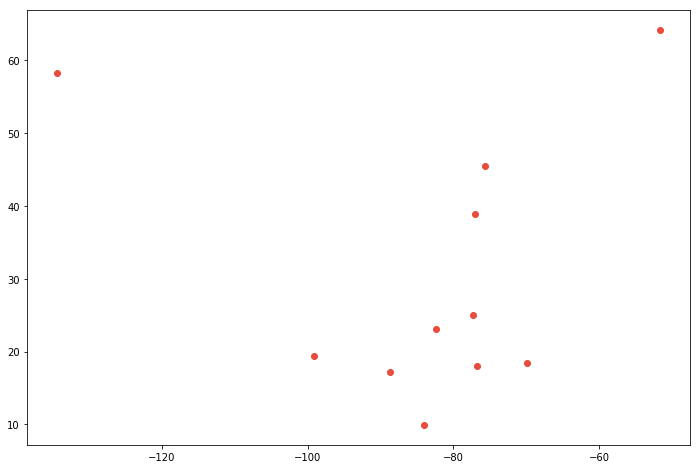

In [25]:
north_america_capital_cities.plot(color='#e74c3c',
                                  figsize=(12,8))

Now join both plots together and show the capital cities `POINT` geometries within the same North America contry-level-map `POLYGON`.

Also, go ahead and pass some parameters to our `plot()` functions. Let's add `color` and `edgecolor` to our base map, and `marker`, `markersize` and `color` to our points.

`markersize` will be acording to the `gdp_per_cap` of each country, the bigger GDP the bigger point.

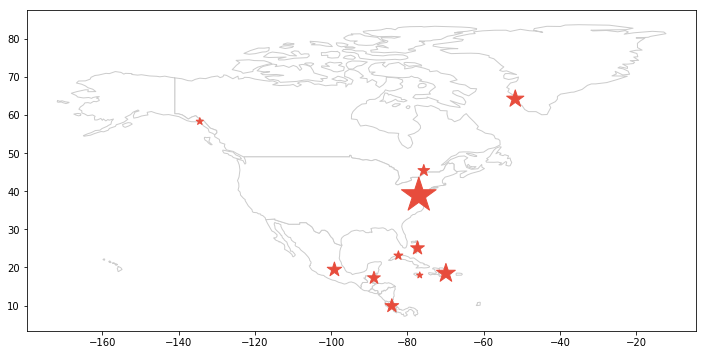

In [26]:
ax = north_america.plot(color='white',
                        edgecolor='#CCCCCC',
                        figsize=(12,8))

north_america_capital_cities.plot(ax=ax,
                                  marker='*',
                                  markersize=1.7/north_america['gdp_per_cap'],
                                  color='#e74c3c')

Let's see the GDP per capita for each North America country. Also, plot over the map the cities.

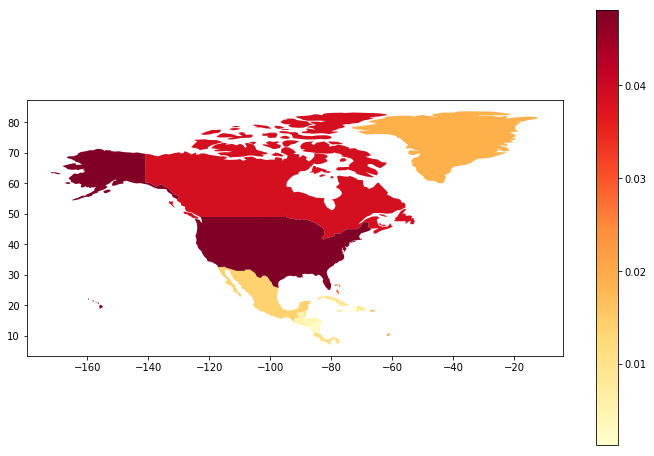

In [27]:
north_america.plot(column='gdp_per_cap',
                   cmap='YlOrRd',
                   legend=True,
                   figsize=(12,8))

Finally let's see only contries where `pop_est` is upper than 10M. Also, add our GDP points with `alpha=0.9`.

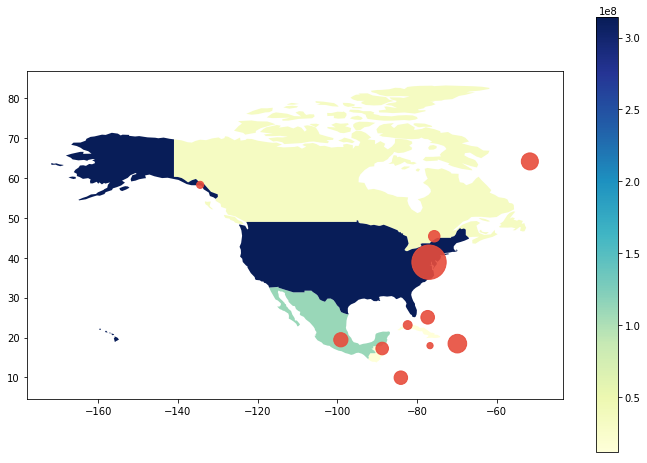

In [28]:
north_america_filter_pop = north_america[north_america['pop_est'] > 10000000]

ax = north_america_filter_pop.plot(column='pop_est',
                                   cmap='YlGnBu',
                                   legend=True,
                                   figsize=(12,8))

north_america_capital_cities.plot(ax=ax,
                                  markersize=1.5/north_america['gdp_per_cap'],
                                  alpha=0.9,
                                  color='#e74c3c')

## Geospatial data over real maps

Geospatial visualization is a big topic, and it's impossible to cover it up in a single guide.

So far we only got a sneak peek of points and polygons visualization, but many other things can be done with these data.

There are also many other packages we didn't cover on this guide. An amazing one is <a href="https://github.com/python-visualization/folium" target="_blank">Folium</a>, that allow us to put geospatial data on interactive maps. Let's use it in a small example.

To use it we just need to import it, and then call the `Map()` function as follows:

In [29]:
import folium

m = folium.Map(location=[45.5236, -122.6750])

m

Let's now try to center that map to show our capital cities of North America. To do that we need to first create a convex `POLYGON` containing all the cities. Finally, get its centroid `POINT`.

In [30]:
cities_coordinates = north_america_capital_cities['coordinates']
cities_line_string = MultiPoint(cities_coordinates)
cities_polygon = Polygon(cities_line_string).convex_hull
cities_centroid = cities_polygon.centroid

print(cities_centroid)

POINT (-88.75104991258469 42.10005780054037)


Also we can tune some maps parameters like `zoom_start` and `tiles` (some options of this are `openstreetmap`, `cartodbpositron`, `cartodbdark_matter`).

In [31]:
import folium

m = folium.Map(location=[cities_centroid.y, cities_centroid.x],
               zoom_start=3,
               min_zoom=2,
               max_zoom=6,
               tiles='openstreetmap'
              )

m

Finally, we place over the map our North America cities as `Choropleth`, and the capitals as `Marker`.

In [32]:
import folium

m = folium.Map(location=[cities_centroid.y, cities_centroid.x],
               zoom_start=3,
               min_zoom=2,
               max_zoom=6,
               tiles='cartodbdark_matter'
              )

# add each city POLYGON
[folium.Choropleth(geo_data=polygon, fill_color='#e67e22').add_to(m)
for polygon in north_america['geometry']]

# add each capital city POINT
[folium.Marker(location=[p.y, p.x]).add_to(m)
 for p in north_america_capital_cities['coordinates']]

m

And that's all for now!

Hope you enjoy it 😃